In [1]:
# Install the required packages.
!pip install datasets
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 4.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 25.0 MB/s eta 0:00:00


# 🤗 Datasets
- [Datasets](https://huggingface.co/docs/datasets/) is a library to easily share and access datasets in Python. It provides a unified API to access a growing list of datasets, with a focus on NLP datasets.
- It is maintained by the Hugging Face team and the community.
- It is built on top of PyArrow, a fast and efficient columnar data format.
- It is designed to work with NumPy, Pandas, PyTorch, TensorFlow, JAX, and many other libraries.


In [2]:
# Datasets imports
from datasets import list_datasets, load_dataset

In [3]:
# Check some datasets.
ds = list_datasets()
print(f"5 firsts Datasets available{ds[:5]}")

# Load emotion dataset.
emotions = load_dataset("emotion")
print(f"keys in the Dataset are {emotions.keys()}")

5 firsts Datasets available['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus']


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

keys in the Dataset are dict_keys(['train', 'validation', 'test'])


In [4]:
# Keep only train Dataset for now.
ds_train = emotions["train"]
print(f"First element in the train set {ds_train[0]}")

First element in the train set {'text': 'i didnt feel humiliated', 'label': 0}


In [5]:
# Pandas conversion
emotions.set_format(type="pandas")
df_train = emotions["train"][:]
df_train.head()

# Add label nanme
def get_label_name(label):
    """Get label name associated to encoded label."""
    return emotions["train"].features["label"].names[label]

df_train["label_name"] = df_train["label"].apply(get_label_name)

# 🤗Tokenizers
- [Tokenizers](https://huggingface.co/docs/tokenizers/) is a library to easily share and access tokenizers in Python. It provides a unified API to access a growing list of tokenizers, with a focus on NLP tokenizers.
- It is maintained by the Hugging Face team and the community.
- It is built on top of Rust, a fast and efficient language.
- It is designed to work with NumPy, Pandas, PyTorch, TensorFlow, JAX, and many other libraries.

In [6]:
# Tokenizer import
from transformers import AutoTokenizer

In [7]:
# AutoTokenizer will automatically select the tokenizer associated to the model.
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

# Tokenize a text example.
text = "This is a silly test for a silly tokenizer."
encoded_text = tokenizer(text)
print(encoded_text)
# Decode the text.
print(tokenizer.convert_ids_to_tokens(encoded_text.input_ids))

{'input_ids': [101, 2023, 2003, 1037, 10021, 3231, 2005, 1037, 10021, 19204, 17629, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
['[CLS]', 'this', 'is', 'a', 'silly', 'test', 'for', 'a', 'silly', 'token', '##izer', '.', '[SEP]']


In [8]:
# Tokenize a whole dataset.
emotions.set_format(type="torch")
emotions_encoded = emotions.map(lambda x: tokenizer(x["text"], padding=True, truncation=True), batched=True, batch_size=None)
first_element_train = emotions_encoded["train"][0]
print(f"First element in the encoded train set {first_element_train}")

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

First element in the encoded train set {'text': 'i didnt feel humiliated', 'label': tensor(0), 'input_ids': tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0]), 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0,

# 🤗 Transformers
- [Transformers](https://huggingface.co/transformers/) is a library to easily share and access state-of-the-art NLP models in Python. It provides a unified API to access a growing list of pretrained models, with a focus on NLP models.
- We use a pretrained model from the [Hugging Face Model Hub](https://huggingface.co/models) to classify the text.
-We will use the [DistilBERT](https://huggingface.co/distilbert-base-uncased) model, which is a small, fast, cheap and light Transformer model trained by distilling BERT base.
- In the first approach, we won't change the model's weights, we will only use it to extract features from the text.
- In the second approach, we will fine-tune the model to classify the text.

In [9]:
# Transformers import
from transformers import AutoModel
# General imports
import torch

In [10]:
model_ckpt = "distilbert-base-uncased"
device = "cuda" if torch.cuda.is_available() else "cpu"
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
# Extract the last hidden states.
# Set format to torch to be able to use the model.
emotions_encoded.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

def extract_last_hidden_states(batch):
    """Extract the last hidden states from the model."""
    inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        outputs = model(**inputs).last_hidden_state
    # Take the last hidden state of the [CLS] token.
    return {"hidden_state": outputs[:, 0, :].cpu().numpy()}

# Extract the last hidden states.
last_hidden_states = emotions_encoded.map(extract_last_hidden_states, batched=True)
last_hidden_states

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

### Create a classifier on top of the last hidden state of the model.
- We use a random classifier on top of the last hidden state of the model.

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

Accuracy on validation set: 0.5265


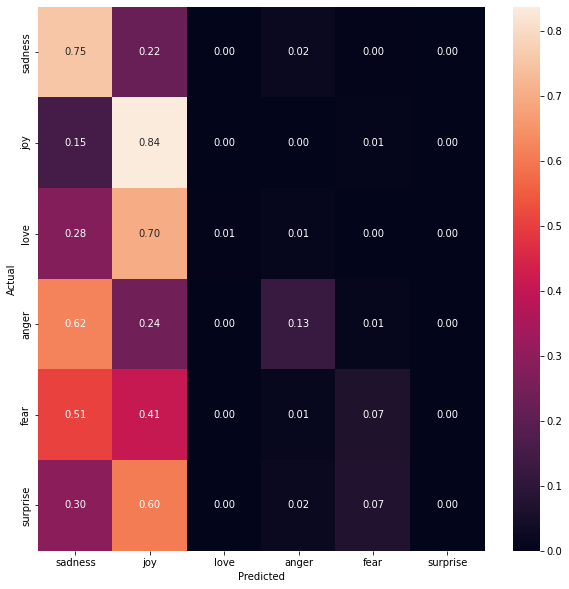

In [13]:
X_train = np.array(last_hidden_states["train"]["hidden_state"])
y_train = np.array(last_hidden_states["train"]["label"])
X_valid = np.array(last_hidden_states["validation"]["hidden_state"])
y_valid = np.array(last_hidden_states["validation"]["label"])

# Scale the data.
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

# Train a simple classifier.
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
print(f"Accuracy on validation set: {clf.score(X_valid, y_valid)}")

# Plot confusion matrix.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, labels):
    """Plot confusion matrix."""
    # Compute confusion matrix.
    cm = confusion_matrix(y_true, y_pred)
    # Normalize the confusion matrix.
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    # Plot the confusion matrix.
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt=".2f", xticklabels=labels, yticklabels=labels)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# Plot confusion matrix.
y_pred = clf.predict(X_valid)
plot_confusion_matrix(y_valid, y_pred, labels=emotions["train"].features["label"].names)

### Create a classifier fine-tuning the pretrained model.
- We fine-tune the pretrained model to classify the text instead of using a random classifier on top of the last hidden state of the model.


In [14]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments
from huggingface_hub import notebook_login
from sklearn.metrics import accuracy_score, f1_score

In [15]:
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [16]:
# Load model.
num_labels = len(emotions["train"].features["label"].names)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device)

# Define performance metrics.
def compute_metrics(eval_pred):
    """Compute accuracy and f1."""
    predictions = eval_pred.predictions.argmax(-1)
    labels = eval_pred.label_ids
    f1 = f1_score(labels, predictions, average="weighted")
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1}

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier

In [17]:
batch_size = 64
model_name = "distilbert-base-uncased-emotion-nlp-with-transformers"
logging_steps = len(emotions["train"]) // batch_size
num_train_epochs = 3

training_args = TrainingArguments(
    output_dir=f"./{model_name}",
    num_train_epochs=num_train_epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    push_to_hub=True,
    log_level="error"
)

Cloning https://huggingface.co/pridaj/distilbert-base-uncased-emotion-nlp-with-transformers into local empty directory.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.507200,0.203207
2,0.146400,0.140928
3,0.094000,0.135964


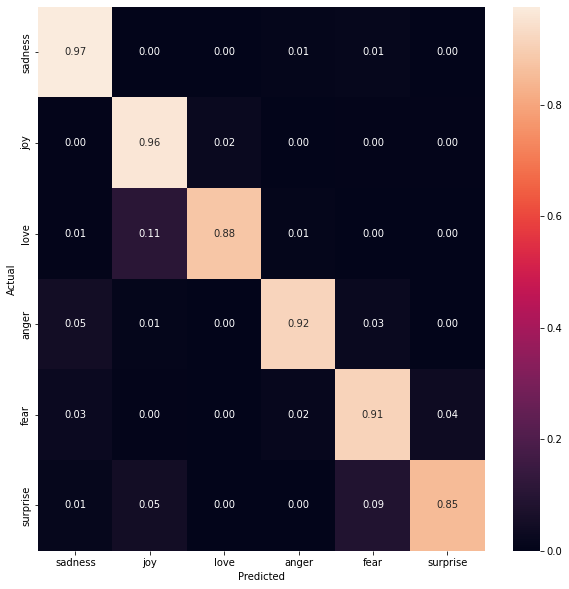

In [19]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotions_encoded["train"],
    eval_dataset=emotions_encoded["validation"],
    tokenizer=tokenizer)

trainer.train()

# Plot confusion matrix.
y_pred = trainer.predict(emotions_encoded["validation"]).predictions.argmax(-1)
plot_confusion_matrix(y_valid, y_pred, labels=emotions["train"].features["label"].names)